In [39]:
import pandas as pd
import geopandas as gpd


In [40]:
vic_coast = gpd.read_file('../../data/landing/coastline/victoria/cstviccd_l.shp')
suburbs = gpd.read_file('../../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp')

# only in vic and remove null geometries
suburbs = suburbs[suburbs['STE_NAME21'] == 'Victoria']
suburbs = suburbs[~suburbs['geometry'].is_empty]



In [41]:
suburbs.head(-5)

,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
4544,20001,Abbeyard,2,Victoria,AUS,Australia,327.5008,http://linked.data.gov.au/dataset/asgsed3/SAL/...,1.207678,0.033162,"POLYGON ((146.89824 -37.04602, 146.89947 -37.0..."
4545,20002,Abbotsford (Vic.),2,Victoria,AUS,Australia,1.7405,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.092990,0.000178,"POLYGON ((145.00195 -37.79665, 145.0019 -37.79..."
4546,20003,Aberfeldie,2,Victoria,AUS,Australia,1.5515,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.059374,0.000159,"POLYGON ((144.89576 -37.76514, 144.89547 -37.7..."
4547,20004,Aberfeldy,2,Victoria,AUS,Australia,10.8319,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.183199,0.001107,"POLYGON ((146.38814 -37.72232, 146.38808 -37.7..."
4548,20005,Acheron,2,Victoria,AUS,Australia,72.6602,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.514040,0.007381,"POLYGON ((145.76731 -37.25433, 145.76757 -37.2..."
...,...,...,...,...,...,...,...,...,...,...,...
7480,22937,Youanmite,2,Victoria,AUS,Australia,71.7487,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.382078,0.007187,"POLYGON ((145.65203 -36.13058, 145.65214 -36.1..."
7481,22938,Youarang,2,Victoria,AUS,Australia,43.7732,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.317605,0.004383,"POLYGON ((145.79987 -36.09918, 145.79993 -36.1..."
7482,22939,Yulecart,2,Victoria,AUS,Australia,73.4938,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.535035,0.007514,"POLYGON ((141.89647 -37.72073, 141.90118 -37.7..."
7483,22940,Yundool,2,Victoria,AUS,Australia,31.6396,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.256626,0.003174,"POLYGON ((145.8604 -36.28432, 145.86038 -36.29..."


In [42]:
# remove nonetype geometries
suburbs = suburbs[suburbs['geometry'].notna()]

In [43]:
vic_coast.FEAT_CODE.unique()

array(['state_border', 'coastline', 'tile_edge'], dtype=object)

In [44]:
# filter to only coast
vic_coast = vic_coast[vic_coast.FEAT_CODE == "coastline"]


In [45]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points


# Ensure both datasets use the same coordinate reference system (CRS)
suburbs = suburbs.to_crs(vic_coast.crs)

# Function to calculate nearest distance
def calculate_distance(suburb, beach_df):
    # Get the centroid of the suburb
    suburb_centroid = suburb.geometry.centroid
    # Find the nearest point from the beach shapefile
    nearest_geom = nearest_points(suburb_centroid, beach_df.unary_union)[1]
    # Calculate the distance
    return suburb_centroid.distance(nearest_geom)

# Calculate proximity for each suburb
suburbs['proximity_to_beach'] = suburbs.apply(calculate_distance, beach_df=vic_coast, axis=1)

suburbs.head()


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_89189/3662542783.py:14: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearest_geom = nearest_points(suburb_centroid, beach_df.unary_union)[1]


,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,proximity_to_beach
4544,20001,Abbeyard,2,Victoria,AUS,Australia,327.5008,http://linked.data.gov.au/dataset/asgsed3/SAL/...,1.207678,0.033162,"POLYGON ((146.89823 -37.04604, 146.89946 -37.0...",1.332311
4545,20002,Abbotsford (Vic.),2,Victoria,AUS,Australia,1.7405,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.092990,0.000178,"POLYGON ((145.00195 -37.79666, 145.00189 -37.7...",0.062930
4546,20003,Aberfeldie,2,Victoria,AUS,Australia,1.5515,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.059374,0.000159,"POLYGON ((144.89575 -37.76515, 144.89546 -37.7...",0.080923
4547,20004,Aberfeldy,2,Victoria,AUS,Australia,10.8319,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.183199,0.001107,"POLYGON ((146.38813 -37.72233, 146.38808 -37.7...",0.973612
4548,20005,Acheron,2,Victoria,AUS,Australia,72.6602,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.514040,0.007381,"POLYGON ((145.76731 -37.25434, 145.76757 -37.2...",0.939350


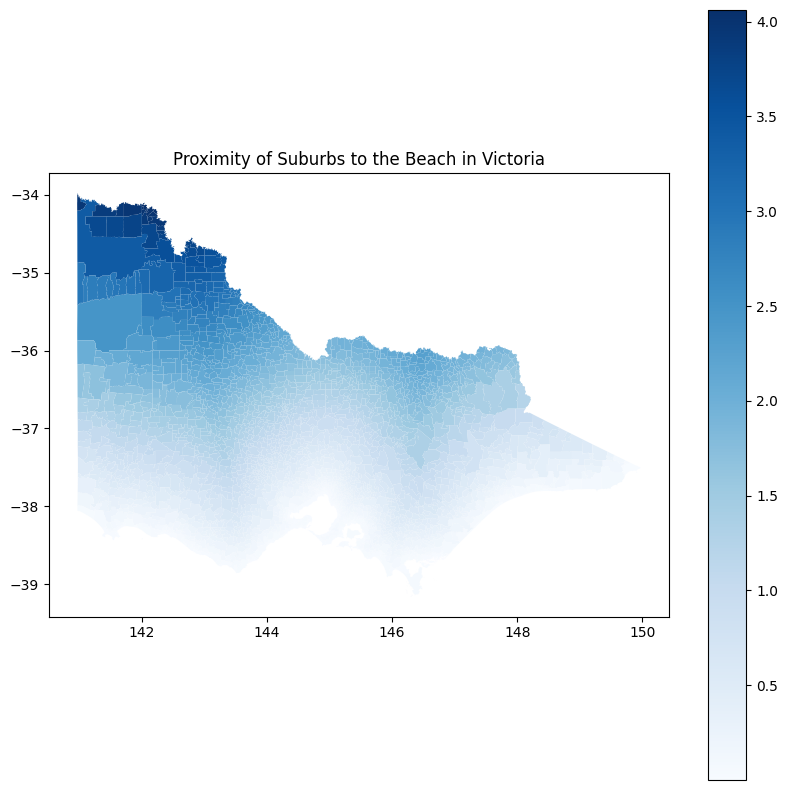

In [46]:
# graph
import matplotlib.pyplot as plt
# Plot the proximity to the beach for each suburb
fig, ax = plt.subplots(figsize=(10, 10))
suburbs.plot(column='proximity_to_beach', cmap='Blues', linewidth=0.8, ax=ax, edgecolor=None, legend=True)
plt.title('Proximity of Suburbs to the Beach in Victoria')
plt.show()


In [51]:
# get SAL code and proximity to beach
suburbs = suburbs[['SAL_CODE21', 'proximity_to_beach']]
suburbs.rename(columns={"SAL_CODE21":"SAL_CODE"}, inplace=True)
suburbs.head()

,SAL_CODE,proximity_to_beach
4544,20001,1.332311
4545,20002,0.062930
4546,20003,0.080923
4547,20004,0.973612
4548,20005,0.939350


In [52]:
# export to csv
suburbs.to_csv('../../data/curated/vic_beach_proximity.csv', index=False)
